<center><h1>Time-Series-Classification</h1></center>
<br>
<br>

Name: Josephina Zhenni Bian
<br>
Github Username: Josephina-Bian
<br>
USC ID: 4158430979

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Obtain Data

Import packages

In [2]:
import pandas as pd
import numpy as np
import glob
import os
from scipy.stats import bootstrap
import seaborn as sns
import statistics
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import statsmodels.api as sm
import warnings
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

Get the AReM Data Set: Add filenames and bending and activity labels to the dataset

In [3]:
df = pd.read_csv('../data/bending1/dataset1.csv',skiprows=4)

# Collecting all Data

df_total = pd.DataFrame(columns=df.columns)
df_total

folders = ['bending1','bending2','cycling','lying','sitting','standing','walking']
for folder in folders:
    #print('folder:', folder)
    filepaths = [f for f in os.listdir("../data/"+folder) if f.endswith('.csv')]
    #print('filepath: ', filepaths)
    
    for file in filepaths:
        filename = "../data/"+folder+"/" + file
        #print('filename:', filename)
        csv = pd.read_csv(filename,skiprows=4)
        csv['filename']=filename
        if folder == 'bending1' or folder == 'bending2':
            #print("True")
            csv['bending']=1
            #print(csv)
            csv['activity']='bending'
        else:
            #print("False")
            csv['bending']=0
            csv['activity'] = folder
        df_total = pd.concat([csv,df_total],ignore_index=True)
      
        
#print(df_total.to_string())
df_total

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      32.25       5.76      14.00       4.36      18.00   
1                 250      37.75       5.07      15.50       3.20      14.75   
2                 500      34.50       2.60      20.00       4.74      20.50   
3                 750      23.75       5.36      11.75       6.22      14.25   
4                1000      41.25       3.77      15.00       6.63      11.50   
...               ...        ...        ...        ...        ...        ...   
42235          118750      43.33       0.47      25.00       0.00      30.00   
42236          119000      43.50       0.50      25.50       0.50      30.00   
42237          119250      43.50       0.50      24.75       0.43      30.00   
42238          119500      43.50       0.50      24.33       0.47      30.00   
42239          119750      43.50       0.50      24.25       0.43      30.00   

       var_rss23                       filename  bending activity  
0           2.12   ../data/walking/dataset9.csv      0.0  walking  
1           1.79   ../data/walking/dataset9.csv      0.0  walking  
2           2.87   ../data/walking/dataset9.csv      0.0  walking  
3           3.77   ../data/walking/dataset9.csv      0.0  walking  
4           2.69   ../data/walking/dataset9.csv      0.0  walking  
...          ...                            ...      ...      ...  
42235       0.00  ../data/bending1/dataset1.csv      1.0  bending  
42236       0.00  ../data/bending1/dataset1.csv      1.0  bending  
42237       0.00  ../data/bending1/dataset1.csv      1.0  bending  
42238       0.00  ../data/bending1/dataset1.csv      1.0  bending  
42239       0.00  ../data/bending1/dataset1.csv      1.0  bending  

[42240 rows x 10 columns]

### (b) Splitting Data

In [4]:
#organizing test data: 9120 rows
df_test = pd.DataFrame(columns=df.columns)

folders = ['bending1','bending2','cycling','lying','sitting','standing','walking']
for folder in folders:
    #print('folder:', folder)
    filepaths = [f for f in os.listdir("../data/"+folder) if f.endswith('.csv')]
    #print('filepath: ', filepaths)
    
    for file in filepaths:
        if (folder == 'bending1' or folder == 'bending2') and (file == 'dataset1.csv' or file == 'dataset2.csv'):
            filename = "../data/"+folder+"/" + file
            #print('filename:', filename)
            csv = pd.read_csv(filename,skiprows=4)
            csv['filename']=filename
            if folder == 'bending1' or folder == 'bending2':
                #print("True")
                csv['bending']=1
                #print(csv)
                csv['activity'] = 'bending'
            else:
                #print("False")
                csv['bending']=0
                csv['activity'] = folder
            df_test = pd.concat([csv,df_test],ignore_index=True)
        elif (folder != 'bending1' and folder != 'bending2') and (file == 'dataset1.csv' or file =='dataset2.csv' or file =='dataset3.csv'):
            filename = "../data/"+folder+"/" + file
            #print('filename:', filename)
            csv = pd.read_csv(filename,skiprows=4)
            csv['filename']=filename
            if folder == 'bending1' or folder == 'bending2':
                #print("True")
                csv['bending']=1
                #print(csv)
                csv['activity'] = 'bending'
            else:
                #print("False")
                csv['bending']=0
                csv['activity'] = folder
            df_test = pd.concat([csv,df_test],ignore_index=True)
        else: continue

df_test

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      24.75       5.76      13.25       3.03      18.75   
1                250      36.25       7.26      15.00       3.67      17.75   
2                500      37.00       3.94      20.25       1.30      16.25   
3                750      33.75       3.27      19.50       4.50      15.00   
4               1000      34.25       5.21      17.00       1.22      14.25   
...              ...        ...        ...        ...        ...        ...   
9115          118750      43.33       0.47      25.00       0.00      30.00   
9116          119000      43.50       0.50      25.50       0.50      30.00   
9117          119250      43.50       0.50      24.75       0.43      30.00   
9118          119500      43.50       0.50      24.33       0.47      30.00   
9119          119750      43.50       0.50      24.25       0.43      30.00   

      var_rss23                       filename  bending activity  
0          1.48   ../data/walking/dataset3.csv      0.0  walking  
1          2.86   ../data/walking/dataset3.csv      0.0  walking  
2          1.64   ../data/walking/dataset3.csv      0.0  walking  
3          2.12   ../data/walking/dataset3.csv      0.0  walking  
4          4.15   ../data/walking/dataset3.csv      0.0  walking  
...         ...                            ...      ...      ...  
9115       0.00  ../data/bending1/dataset1.csv      1.0  bending  
9116       0.00  ../data/bending1/dataset1.csv      1.0  bending  
9117       0.00  ../data/bending1/dataset1.csv      1.0  bending  
9118       0.00  ../data/bending1/dataset1.csv      1.0  bending  
9119       0.00  ../data/bending1/dataset1.csv      1.0  bending  

[9120 rows x 10 columns]

In [5]:
# Collecting Train Data: 33120 rows

df_train = pd.DataFrame(columns=df.columns)
df_train

folders = ['bending1','bending2','cycling','lying','sitting','standing','walking']
for folder in folders:
    #print('folder:', folder)
    filepaths = [f for f in os.listdir("../data/"+folder) if f.endswith('.csv')]
    #print('filepath: ', filepaths)
    
    for file in filepaths:
        if (folder == 'bending1' or folder == 'bending2') and (file != 'dataset1.csv' and file != 'dataset2.csv'):
            filename = "../data/"+folder+"/" + file
            #print('filename:', filename)
            csv = pd.read_csv(filename,skiprows=4)
            csv['filename']=filename
            if folder == 'bending1' or folder == 'bending2':
                #print("True")
                csv['bending']=1
                #print(csv)
                csv['activity'] = 'bending'
            else:
                #print("False")
                csv['bending']=0
                csv['activity'] = folder
            df_train = pd.concat([csv,df_train],ignore_index=True)
        elif (folder != 'bending1' and folder != 'bending2') and (file != 'dataset1.csv' and file !='dataset2.csv' and file !='dataset3.csv'):
            filename = "../data/"+folder+"/" + file
            #print('filename:', filename)
            csv = pd.read_csv(filename,skiprows=4)
            csv['filename']=filename
            if folder == 'bending1' or folder == 'bending2':
                #print("True")
                csv['bending']=1
                #print(csv)
                csv['activity'] = 'bending'
            else:
                #print("False")
                csv['bending']=0
                csv['activity'] = folder
            df_train = pd.concat([csv,df_train],ignore_index=True)
        else: continue

#print(df_train.to_string())
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                   0      32.25       5.76      14.00       4.36      18.00   
1                 250      37.75       5.07      15.50       3.20      14.75   
2                 500      34.50       2.60      20.00       4.74      20.50   
3                 750      23.75       5.36      11.75       6.22      14.25   
4                1000      41.25       3.77      15.00       6.63      11.50   
...               ...        ...        ...        ...        ...        ...   
33115          118750      42.50       0.50      20.00       0.82      36.00   
33116          119000      42.67       0.47      21.00       0.00      36.33   
33117          119250      44.33       0.94      21.00       0.00      36.33   
33118          119500      45.25       0.43      26.75       1.79      36.00   
33119          119750      47.25       0.83      29.75       0.43      35.25   

       var_rss23                       filename  bending activity  
0           2.12   ../data/walking/dataset9.csv      0.0  walking  
1           1.79   ../data/walking/dataset9.csv      0.0  walking  
2           2.87   ../data/walking/dataset9.csv      0.0  walking  
3           3.77   ../data/walking/dataset9.csv      0.0  walking  
4           2.69   ../data/walking/dataset9.csv      0.0  walking  
...          ...                            ...      ...      ...  
33115       0.00  ../data/bending1/dataset3.csv      1.0  bending  
33116       0.47  ../data/bending1/dataset3.csv      1.0  bending  
33117       0.47  ../data/bending1/dataset3.csv      1.0  bending  
33118       0.00  ../data/bending1/dataset3.csv      1.0  bending  
33119       1.30  ../data/bending1/dataset3.csv      1.0  bending  

[33120 rows x 10 columns]

### (c) Feature Extraction

In [6]:
#there are 88 dataset.csv, each dataset.csv == an instance, calculate the features  
lst = ['mean','std','min','25%','50%','75%','max']
table = pd.DataFrame (columns = ['instance'])
for i in range(1,7):
    for item in lst:
        table[item+str(i)] = ""
#print(table)

df_total = pd.DataFrame(columns=df.columns)
df_total

n=1

folders = ['bending1','bending2','cycling','lying','sitting','standing','walking']
for folder in folders:
    #print('folder:', folder)
    filepaths = [f for f in os.listdir("../data/"+folder) if f.endswith('.csv')]
    #print('filepath: ', filepaths)
    
    for file in filepaths:  #reading each csv file
        filename = "../data/"+folder+"/" + file
        #print('filename:', filename)
        #df_total = pd.concat([pd.read_csv(filename,skiprows=4),df_total],ignore_index=True)
        csv = pd.read_csv(filename, skiprows=4)
        summary = csv.describe()  #i dont want #columns: time
        #print(summary)
        summary = summary.drop(columns='# Columns: time')
        summary_new = summary.T.drop(columns='count')
        #print(summary_new)
        flat = summary_new.to_numpy().flatten()
        #print(flat)
        flat_lst = flat.tolist()
        flat_lst.insert(0,n)
        #print(flat_lst)
        tem_df = pd.DataFrame([flat_lst],columns=table.columns)
        n+=1
        table = table.append(tem_df)

table

instance      mean1      std1   min1   25%1    50%1     75%1   max1  \
0         1  40.624792  1.476967  37.25  39.25  40.500  42.0000  45.00   
0         2  42.812812  1.435550  38.00  42.00  42.500  43.6700  45.67   
0         3  43.954500  1.558835  35.00  43.00  44.330  45.0000  47.40   
0         4  42.179812  3.670666  33.00  39.15  43.500  45.0000  47.75   
0         5  41.678063  2.243490  33.00  41.33  41.750  42.7500  45.75   
..      ...        ...       ...    ...    ...     ...      ...    ...   
0        84  34.763333  4.742208  20.75  31.67  35.290  38.2500  46.25   
0        85  34.935812  4.645944  21.50  32.00  35.500  38.0625  51.00   
0        86  34.333042  4.948770  18.33  31.25  34.750  38.0000  47.67   
0        87  34.599875  4.731790  18.33  31.50  35.125  38.0000  45.75   
0        88  34.225875  4.441798  15.50  31.25  34.750  37.2500  43.67   

       mean2      std2  ...   50%5   75%5   max5     mean6      std6  min6  \
0   0.358604  0.322605  ...  35.00  36.00  38.25  0.570583  0.582915   0.0   
0   0.372437  0.289158  ...  33.00  34.50  38.50  0.571083  0.601010   0.0   
0   0.426250  0.338690  ...  36.00  36.50  38.50  0.493292  0.513506   0.0   
0   0.696042  0.630860  ...  35.00  36.33  38.67  0.613521  0.524317   0.0   
0   0.535979  0.405469  ...  30.00  31.25  37.50  0.383292  0.389164   0.0   
..       ...       ...  ...    ...    ...    ...       ...       ...   ...   
0   4.223792  2.278004  ...  16.25  18.33  25.50  3.288271  1.647528   0.0   
0   4.115750  2.335243  ...  16.25  18.25  25.00  3.280021  1.700918   0.0   
0   4.396958  2.568680  ...  16.00  18.00  24.00  3.261583  1.617290   0.0   
0   4.398833  2.538521  ...  16.00  18.25  23.25  3.289542  1.680170   0.0   
0   4.354500  2.518991  ...  16.25  18.25  24.00  3.479542  1.761146   0.0   

    25%6   50%6    75%6   max6  
0   0.00  0.430  1.3000   1.92  
0   0.00  0.430  1.3000   3.11  
0   0.00  0.430  0.9400   1.79  
0   0.00  0.500  1.0000   2.18  
0   0.00  0.430  0.5000   1.79  
..   ...    ...     ...    ...  
0   2.05  3.270  4.3050   9.39  
0   2.12  3.015  4.5000  10.21  
0   2.05  2.980  4.3200   8.01  
0   2.12  3.015  4.2600   8.86  
0   2.24  3.270  4.5375   9.42  

[88 rows x 43 columns]

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

    median1      mean1      std1  median2     mean2      std2  median6     mean6      std6  bending
0    34.750  34.225875  4.441798    3.900  4.354500  2.518991    3.270  3.479542  1.761146      0.0
1    35.125  34.599875  4.731790    4.025  4.398833  2.538521    3.015  3.289542  1.680170      0.0
2    34.750  34.333042  4.948770    3.900  4.396958  2.568680    2.980  3.261583  1.617290      0.0
3    35.500  34.935812  4.645944    3.845  4.115750  2.335243    3.015  3.280021  1.700918      0.0
4    35.290  34.763333  4.742208    3.900  4.223792  2.278004    3.270  3.288271  1.647528      0.0
5    36.000  35.193333  4.751868    3.880  4.321021  2.625516    3.015  3.241958  1.769182      0.0
6    35.000  34.473188  4.796705    3.960  4.359312  2.388746    3.090  3.340458  1.699114      0.0
7    35.250  34.873229  4.531720    3.925  4.380583  2.435437    3.270  3.424646  1.690960      0.0
8    35.250  34.546229  4.842294    4.135  4.371958  2.360448    3.080  3.338125  1.656742      0.0


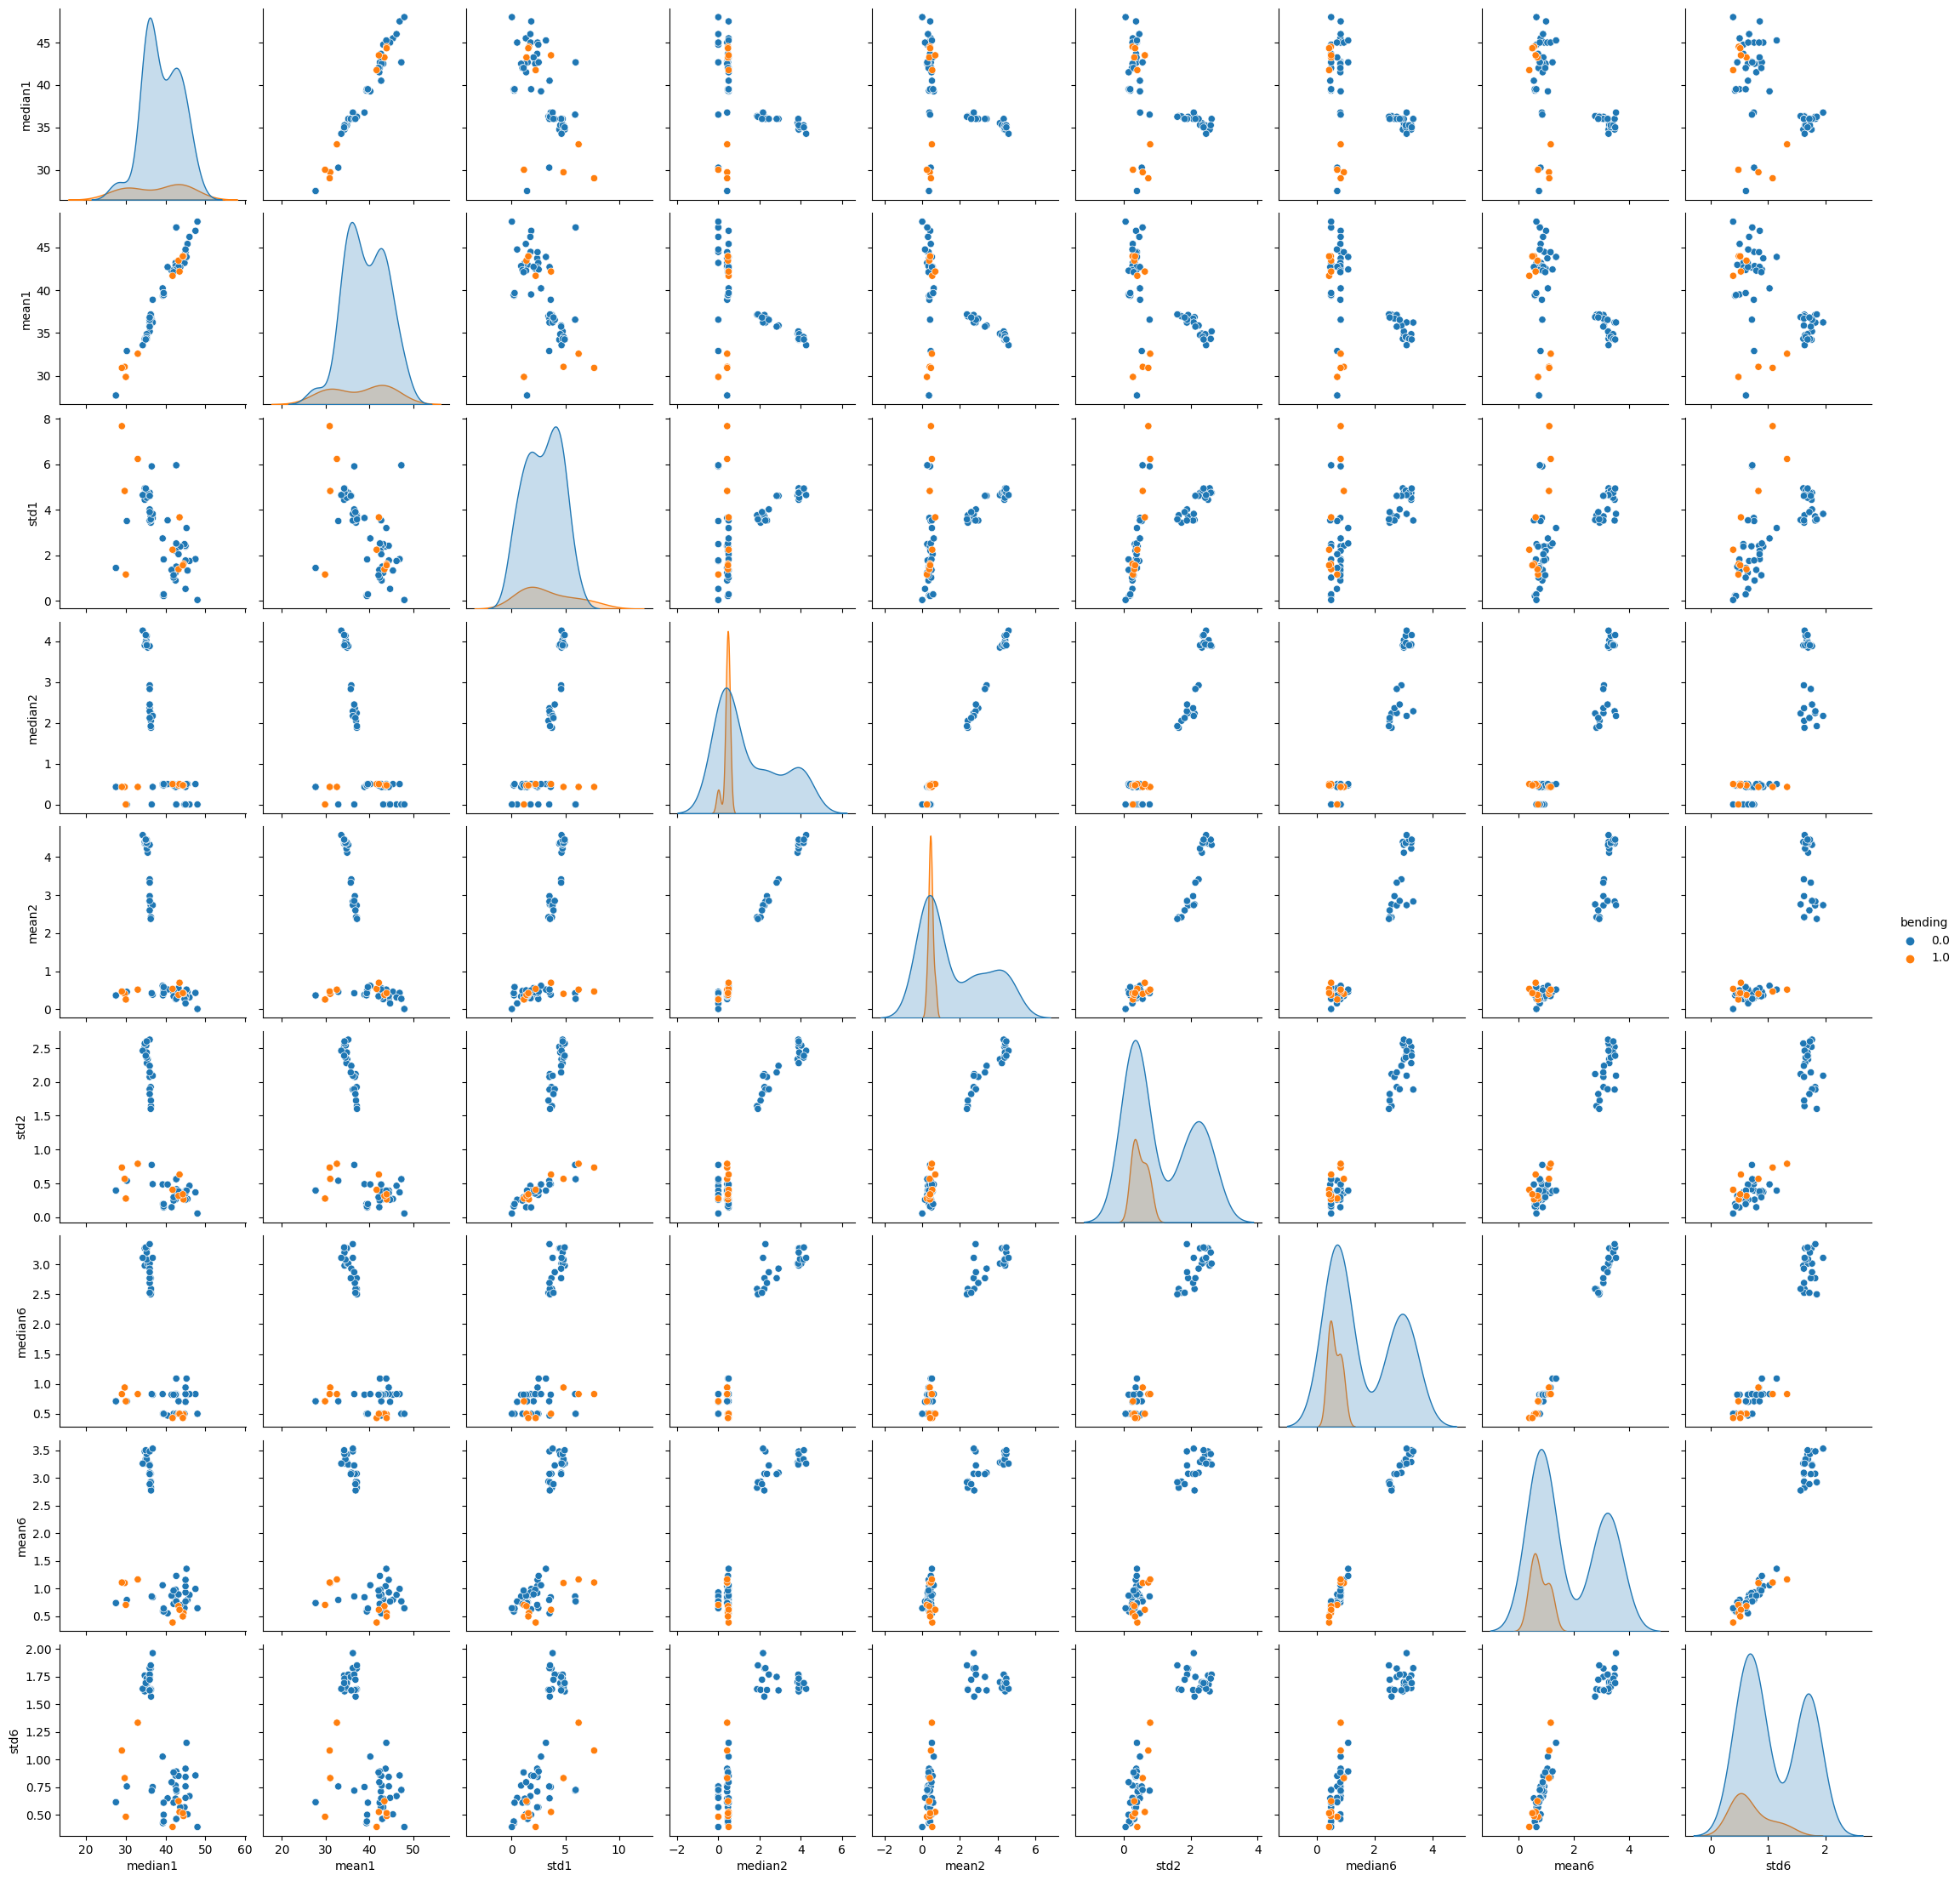

In [55]:
data = df_train.loc[:,['avg_rss12', 'var_rss12', 'var_rss23','bending','filename']]
files = df_train['filename'].unique()
#print(files)
#print(data)

l1_training = pd.DataFrame(columns=['median1','mean1','std1','median2','mean2','std2','median6','mean6','std6','bending'])

for file in files:
    #print(file)
    data_tem = data.loc[data['filename']==file]
    #print(data_tem)
    
    median1 = statistics.median(data_tem['avg_rss12'])
    mean1 = statistics.mean(data_tem['avg_rss12'])
    std1 = statistics.stdev(data_tem['avg_rss12'])
    median2 = statistics.median(data_tem['var_rss12'])
    mean2 = statistics.mean(data_tem['var_rss12'])
    std2 = statistics.stdev(data_tem['var_rss12'])
    median6 = statistics.median(data_tem['var_rss23'])
    mean6 = statistics.mean(data_tem['var_rss23'])
    std6 = statistics.stdev(data_tem['var_rss23'])
    bending = data_tem.iloc[-1,-2]
    
    rowlst = [median1,mean1,std1,median2,mean2,std2,median6,mean6,std6,bending]
    #print(rowlst)
    
    l1_training.loc[len(l1_training)] = rowlst
    #break

print(l1_training.to_string())  

sns.pairplot(l1_training,hue='bending')


#here I have l=1, 69 rows ----- runtime = 36.4s - 52s

#### ii. Splitted Plots

In [56]:
l = 2

df_train_split = pd.DataFrame()

files = df_train['filename'].unique()

for file in files:
    #print(file)
    data_tem = df_train.loc[df_train['filename']==file]
    #print(data_tem)
    file_row = len(data_tem)
    #print(file_row)
    if file_row == 479:
        print(file)  #modified sitting/dataset8.csv, which has 479 rows. I copied the last row again at the bottom
        df_train1 = data_tem.iloc[:file_row//l,:-1]
        print(df_train1)
        df_train2 = data_tem.iloc[file_row//l+1:-1]
        print(df_train2)
        df_train_tem = pd.concat([df_train1,df_train2.set_index(df_train1.index)],axis=1)
        df_train_split = pd.concat([df_train_tem,df_train_split],axis=0,ignore_index=True)
     
    else:    
        df_train1 = data_tem.iloc[:file_row//l,:-1]
        #print('df_train1',df_train1)
        df_train2 = data_tem.iloc[file_row//l:,:-1]
        #print('df_train2', df_train2)
        df_train_tem = pd.concat([df_train1,df_train2.set_index(df_train1.index)],axis=1)
        #print(df_train_tem)
        #print(type(df_train_split))
        df_train_split = pd.concat([df_train_tem,df_train_split],axis=0,ignore_index=True)
        #df_train_split = df_train_split.append(df_train_tem)
        #print(df_train_split)
    #break

df_train_split.columns = ['# Columns: time','avg_rss12(1)','var_rss12(1)','avg_rss13(1)','var_rss13(1)','avg_rss23(1)','var_rss23(1)','filename','bending',
'# Columns: time','avg_rss12(2)','var_rss12(2)','avg_rss13(2)','var_rss13(2)','avg_rss23(2)','var_rss23(2)','filename','bending']

df_train_split = df_train_split.loc[:,~df_train_split.columns.duplicated()].copy()
#df_train_split = df_train_split.drop(columns='filename')

#print(df_train_split.to_string())

df_train_split


# Columns: time  avg_rss12(1)  var_rss12(1)  avg_rss13(1)  var_rss13(1)  \
0                   0         42.00          0.71         21.25          0.43   
1                 250         41.50          0.50         20.25          1.48   
2                 500         41.50          0.50         14.25          1.92   
3                 750         40.75          0.83         15.75          0.43   
4                1000         40.00          0.71         20.00          2.74   
...               ...           ...           ...           ...           ...   
16555           58750         37.25          4.26         16.25          3.63   
16556           59000         24.25          3.27         12.25          1.79   
16557           59250         27.25          7.98         17.75          4.44   
16558           59500         41.00          4.06         16.00          3.24   
16559           59750         31.50          3.20         17.75          2.68   

       avg_rss23(1)  var_rss23(1)                       filename  bending  \
0             30.00          0.00  ../data/bending1/dataset3.csv      1.0   
1             31.25          1.09  ../data/bending1/dataset3.csv      1.0   
2             33.00          0.00  ../data/bending1/dataset3.csv      1.0   
3             33.00          0.00  ../data/bending1/dataset3.csv      1.0   
4             32.75          0.43  ../data/bending1/dataset3.csv      1.0   
...             ...           ...                            ...      ...   
16555         14.50          2.60   ../data/walking/dataset9.csv      0.0   
16556         13.50          5.59   ../data/walking/dataset9.csv      0.0   
16557         13.00          6.52   ../data/walking/dataset9.csv      0.0   
16558         15.50          5.41   ../data/walking/dataset9.csv      0.0   
16559         15.50          3.04   ../data/walking/dataset9.csv      0.0   

       avg_rss12(2)  var_rss12(2)  avg_rss13(2)  var_rss13(2)  avg_rss23(2)  \
0             43.33          0.94         18.00          0.00         35.67   
1             44.20          0.75         19.75          0.83         35.40   
2             45.00          0.00         21.75          0.83         35.00   
3             45.00          0.00         23.33          0.47         36.00   
4             45.00          0.00         24.00          0.00         36.00   
...             ...           ...           ...           ...           ...   
16555         31.50          1.66         12.50          3.20         14.25   
16556         27.33          1.25         11.33          0.94         20.00   
16557         37.80          7.68         14.20          2.48         17.25   
16558         33.75          1.30         15.75          5.21         16.50   
16559         32.67          3.09         18.67          0.47         14.00   

       var_rss23(2)  
0              0.47  
1              1.20  
2              1.41  
3              0.00  
4              0.00  
...             ...  
16555          4.44  
16556          4.00  
16557          0.83  
16558          2.69  
16559          3.16  

[16560 rows x 15 columns]

    median1(1)   mean1(1)   std1(1)  median2(1)  mean2(1)   std2(1)  \
0       34.710  34.329333  4.549837       3.880  4.315917  2.470266   
1       35.750  34.836458  4.869092       3.770  4.257750  2.512633   
2       34.375  33.886458  5.143776       3.900  4.332208  2.453111   
3       35.500  34.737042  4.276717       4.030  4.217333  2.337759   
4       35.500  34.966250  4.733014       3.900  4.207958  2.331940   
..         ...        ...       ...         ...       ...       ...   
64      43.710  43.486208  1.281976       0.470  0.378667  0.284434   
65      45.000  44.117042  1.359836       0.000  0.250042  0.314099   
66      42.330  41.621208  3.118644       0.500  0.623083  0.489595   
67      45.000  43.278875  3.473355       0.485  0.673292  0.634285   
68      44.500  44.057167  1.556971       0.470  0.381042  0.329540   

    median6(1)  mean6(1)   std6(1)  median1(2)   mean1(2)   std1(2)  \
0        3.180  3.381250  1.725690      34.750  34.122417  4.338107   
1    

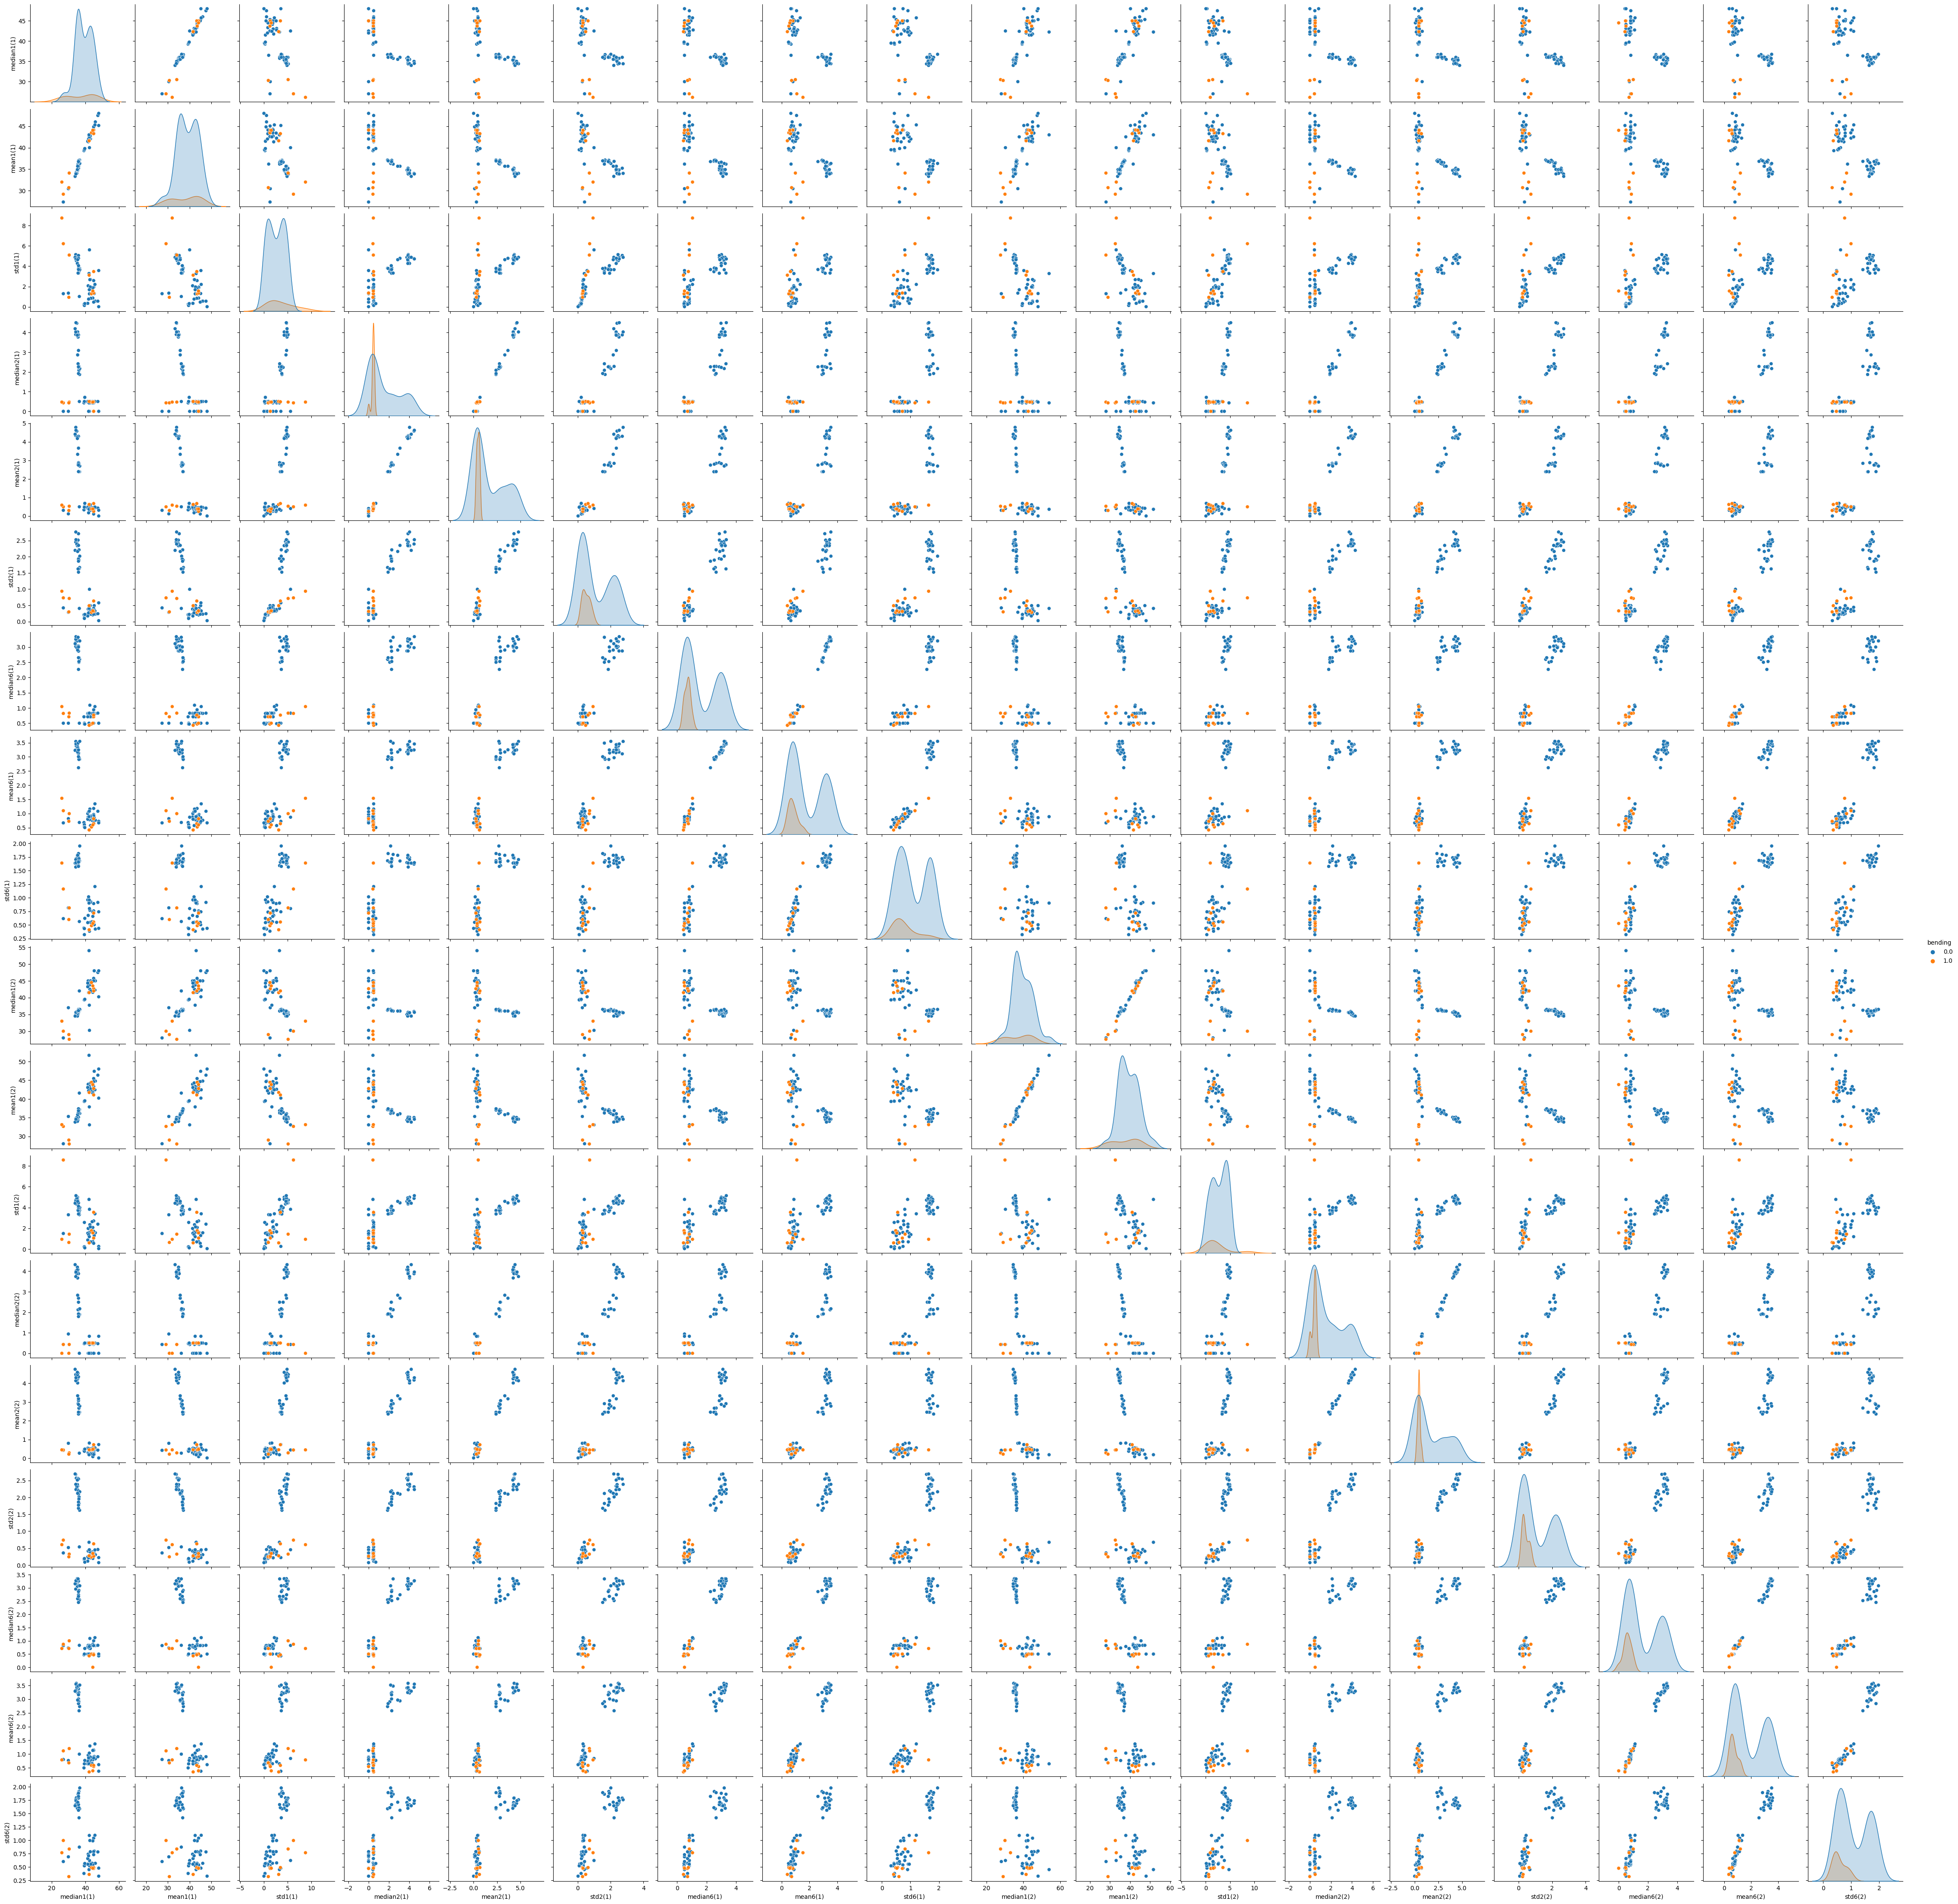

In [57]:
l2_training = pd.DataFrame(columns=['median1(1)','mean1(1)','std1(1)','median2(1)','mean2(1)','std2(1)','median6(1)','mean6(1)','std6(1)',
                                'median1(2)','mean1(2)','std1(2)','median2(2)','mean2(2)','std2(2)','median6(2)','mean6(2)','std6(2)','bending'])

for file in files:
    data_tem = df_train_split.loc[df_train_split['filename']==file]
    #print(data_tem)
    
    median1_1 = statistics.median(data_tem['avg_rss12(1)'])
    mean1_1 = statistics.mean(data_tem['avg_rss12(1)'])
    std1_1 = statistics.stdev(data_tem['avg_rss12(1)'])
    median2_1 = statistics.median(data_tem['var_rss12(1)'])
    mean2_1 = statistics.mean(data_tem['var_rss12(1)'])
    std2_1 = statistics.stdev(data_tem['var_rss12(1)'])
    median6_1 = statistics.median(data_tem['var_rss23(1)'])
    mean6_1 = statistics.mean(data_tem['var_rss23(1)'])
    std6_1 = statistics.stdev(data_tem['var_rss23(1)'])
    
    median1_2 = statistics.median(data_tem['avg_rss12(2)'])
    mean1_2 = statistics.mean(data_tem['avg_rss12(2)'])
    std1_2 = statistics.stdev(data_tem['avg_rss12(2)'])
    median2_2 = statistics.median(data_tem['var_rss12(2)'])
    mean2_2 = statistics.mean(data_tem['var_rss12(2)'])
    std2_2 = statistics.stdev(data_tem['var_rss12(2)'])
    median6_2 = statistics.median(data_tem['var_rss23(2)'])
    mean6_2 = statistics.mean(data_tem['var_rss23(2)'])
    std6_2 = statistics.stdev(data_tem['var_rss23(2)'])
    
    bending = data_tem.iloc[-1,8]
    
    rowlst = [median1_1,mean1_1,std1_1,median2_1,mean2_1,std2_1,median6_1,mean6_1,std6_1,median1_2,mean1_2,std1_2,median2_2,mean2_2,std2_2,median6_2,mean6_2,std6_2,bending]
    #print(rowlst)
    
    l2_training.loc[len(l2_training)] = rowlst


#print(l2_training.to_string())
print(l2_training)

sns.pairplot(l2_training,hue='bending')

#Here I have l = 2 --- runtime = 2m32s - 5m11s

#### Comparing the grapth from 2a(ii) with the graph from 2a(i), I notice that some of the positive and the negative classes are becoming more well-separated. 

#### iii. Time Series Segments

In [7]:
def create_df (df_train,l): #function for reading each file, creating dataframe with the parameter L=l
    files = df_train['filename'].unique()
    df_train_split = pd.DataFrame()
    
    col_lst = []
    for i in range(l*6):
        for feature in ['mean','median','std']:
            col_lst.append(feature+str(i))
    col_lst.append('bending')
    #print(len(col_lst))
    
    df_time_domain = pd.DataFrame(columns = col_lst)
    
    for file in files:  #reading each file, creating dataframe
        df_train_tem = pd.DataFrame()
        #print(file)
        data_tem = df_train.loc[df_train['filename']==file]
        data_tem = data_tem.drop(columns='filename')
        #print(data_tem)
        file_row = len(data_tem)
        
        #print(file_row)
        
        for i in range(1,l+1):
            #print('i',i)
            break_point = file_row//l
            #print("breakpoint", break_point)
            
            if i == 1:
                df_train_part1 = data_tem.iloc[:break_point,:]  #slect the first partition of the data. Break point == file_row//l
                df_train_part1 = df_train_part1.drop(columns= ['# Columns: time', 'activity'])
                bending = df_train_part1['bending']
                #print(bending)
                df_train_part1 = df_train_part1.drop(columns=['bending'])
                #print('df_train_part1', df_train_part1)
                df_train_tem = pd.DataFrame(df_train_part1)          
            else:   
                df_train1 = data_tem.iloc[((i-1)*break_point):(i*break_point),:]   #select the other partitions of the data by taking different steps
                df_train1 = df_train1.drop(columns=['bending','# Columns: time','activity'])
                #print('df_train_1',df_train1)
                df_train_tem = pd.concat([df_train_tem.set_index(df_train1.index),df_train1],axis=1)

        df_train_tem = pd.concat([df_train_tem.set_index(bending.index),bending],axis=1)
                
        #print(df_train_tem)  #the dataframe for each file
        
        
        
        # computing time-domain features for each file:
        
        #print(len(df_train_tem.columns))
        rowlst = []
        for i in range(len(df_train_tem.columns)-1):
            #print(i)
            col = df_train_tem.iloc[:,i]
            median = statistics.median(col)
            mean = statistics.mean(col)
            std = statistics.stdev(col)
            #print(median)
            #print(mean)
            #print(std)
            rowlst.append(median)
            rowlst.append(median)
            rowlst.append(std)
        rowlst.append(df_train_tem.iloc[-1,-1])
        #print('rowlst', rowlst)
        #print('len rowlst', len(rowlst))
        df_time_domain.loc[len(df_time_domain)] = rowlst
        #print(df_time_domain)
        #df_train_split = pd.concat([df_train_split,df_train_tem],axis=0,ignore_index=False)
        #df_train_split.append(df_train_tem)
        
    return df_time_domain

#print('df_time_domian', create_df(df_test, 1))

In [8]:
#main loop: creating a list of dataframes for L = {1,2,3...20}
lst_df_time_domain = []
for l in range(1,21): #main for-loop
    #print(l)
    df_time_domain = create_df(df_train, l)
    lst_df_time_domain.append(df_time_domain)
    
print(lst_df_time_domain)

# runtime = 1m-2m21s    

[     mean0  median0      std0  mean1  median1      std1   mean2  median2  \
0   34.750   34.750  4.441798  3.900    3.900  2.518991  15.500   15.500   
1   35.125   35.125  4.731790  4.025    4.025  2.538521  15.000   15.000   
2   34.750   34.750  4.948770  3.900    3.900  2.568680  15.500   15.500   
3   35.500   35.500  4.645944  3.845    3.845  2.335243  15.500   15.500   
4   35.290   35.290  4.742208  3.900    3.900  2.278004  15.330   15.330   
..     ...      ...       ...    ...      ...       ...     ...      ...   
64  44.500   44.500  1.618364  0.470    0.470  0.263111  16.250   16.250   
65  43.250   43.250  1.386098  0.470    0.470  0.315566  15.000   15.000   
66  41.750   41.750  2.243490  0.500    0.500  0.405469  19.125   19.125   
67  43.500   43.500  3.670666  0.500    0.500  0.630860  23.000   23.000   
68  44.330   44.330  1.558835  0.470    0.470  0.338690  23.000   23.000   

        std2  mean3  median3      std3  mean4  median4      std4  mean5  \
0   2.81227

In [11]:
# getting the best value of the pair (l,p) for Logistic Regression Model by using 5 fold cross-validation

l=1
lst = []
rfecv_lst = []
dummy_score = 0
model_selected=0
l_max_log = 0
for df in lst_df_time_domain:
    y_label = df['bending']
    x_features = df.loc[:, df.columns != 'bending']
    rfecv = RFECV(estimator=LogisticRegression(max_iter=1000, n_jobs=-1), scoring='f1')  #5-fold cross-validation is set by default as well
    rfecv.fit(x_features, y_label)
    cv_result = max(rfecv.cv_results_['mean_test_score'])
    if dummy_score < cv_result:
        dummy_score = cv_result
        p = rfecv.n_features_
        model_selected=rfecv
        l_max_log = l
    l += 1
    
log_model=model_selected
print("For Logistic Regression Model,")
print('final l_max_log:', l_max_log)    
print('final p:',p)
print('score:', dummy_score)
print('model:', log_model)

For Logistic Regression Model,
final l_max_log: 17
final p: 6
score: 0.9333333333333332
model: RFECV(estimator=LogisticRegression(max_iter=1000, n_jobs=-1), scoring='f1')


#### The right way is to use cross-validation to select features. The wrong way has selected features before cross-validation so that the model have seen the features ahead. Then, when doing validation, we are not getting different models. However, the goal of feature selection is to get different models.

#### iv. Confusion Matrix

#### The best Logistic Regression model based on mean f1 score is (L=17, p=6).

In [58]:
# Selecting the training dataset for the optimal pair of L and P

df_train_best = lst_df_time_domain[l_max_log-1]
#print(df_train_best)

y_label_train = df_train_best['bending']
#print(y_label_train)

x_features_train = df_train_best.loc[:, df_train_best.columns != 'bending']
#print(x_features_train)


Here is the confusion matrix for the Logistic Regression Model:
 [[60  0]
 [ 0  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

The AUC score for the Logistic Regression Model is 1.0


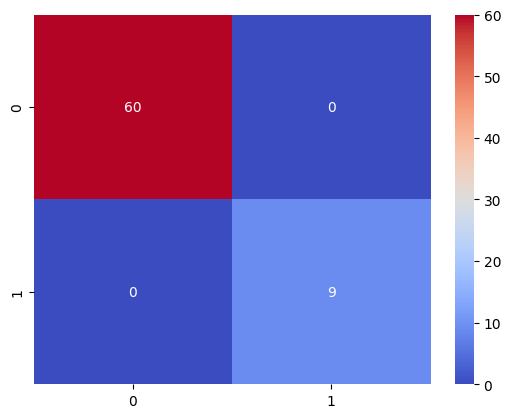

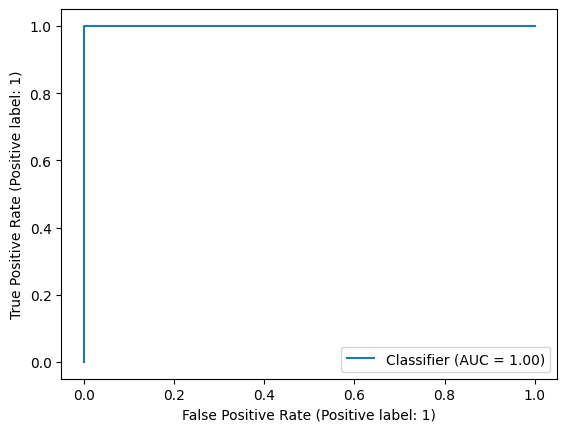

In [13]:
y_pred_train = log_model.predict(x_features_train.values)
# print(y_pred_train)

# Confusion Matrix
print("\nHere is the confusion matrix for the Logistic Regression Model:\n", metrics.confusion_matrix(y_label_train,y_pred_train))
tn, fp, fn, tp = metrics.confusion_matrix(y_label_train,y_pred_train).ravel()
print(metrics.classification_report(y_label_train,y_pred_train))
sns.heatmap(metrics.confusion_matrix(y_label_train,y_pred_train), cmap="coolwarm", annot=True)

# ROC Curve and AUC Score
print('The AUC score for the Logistic Regression Model is', metrics.roc_auc_score(y_label_train,y_pred_train))
metrics.RocCurveDisplay.from_predictions(y_label_train,y_pred_train)

In [14]:
# select x-features by using support_
# print(log_model.support_)
i = 0
i_lst = []
for feature in log_model.support_:
    if feature == True:
        i_lst.append(i)
    i += 1
#print(i_lst)

x_features_train_selected = x_features_train.iloc[:,i_lst]
#print(x_features_train_selected)

# Get the parameters
results_at = Logit(y_pred_train,sm.add_constant(x_features_train_selected)).fit(method = 'bfgs')
print(results_at.summary())

         Current function value: 0.000002
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        15:54:57   Log-Likelihood:            -0.00014143
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.738e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -201.7598        nan        nan        nan         nan         n

#### Note: The p-values for the parameters are not definite due to well-separated data, which makes the model instable.

#### v. Testing the Logistic Regression Classifier

In [43]:
# Select x features for test dataset
files = df_test['filename'].unique()
df_test_best = create_df(df_test,l_max_log)
#print(df_test_best)
y_label_test = df_test_best['bending']
x_features_test = df_test_best.loc[:, df_test_best.columns != 'bending']
#x_features_log_test = log_model.transform(x_features_test)
#print(x_features_log_test)


Here is the confusion matrix:
 [[15  0]
 [ 1  3]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.75      0.86         4

    accuracy                           0.95        19
   macro avg       0.97      0.88      0.91        19
weighted avg       0.95      0.95      0.94        19



<AxesSubplot: >

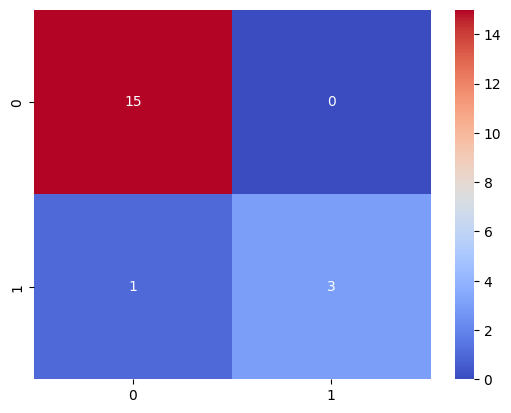

In [44]:
#x_features_test = df_test_best.loc[:, df_test_best.columns != 'bending']
#print(x_features_test)
#print(y_label_test)
y_pred_test = log_model.predict(x_features_test.values)
print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label_test,y_pred_test))
#tn, fp, fn, tp = metrics.confusion_matrix(y_label_test,y_pred_test).ravel()
print(metrics.classification_report(y_label_test,y_pred_test))
sns.heatmap(metrics.confusion_matrix(y_label_test,y_pred_test), cmap="coolwarm", annot=True)


#### The accuracy on the f1 test score (=0.95) is slightly higher than the cross-validation accuracy (=0.93).

#### vi. Separation

#### Yes, classes are well-seperated as I encountered error messages for max-iteration. Also, the training error is very low. Thus, I should encounter instability.

#### vii. Imbalance Dataset: Redoing Logistic Regression Using SMOTE

In [85]:
# getting the best value of the pair (l,p) for the new Logistic Regression Model based on resampled data by using 5 fold cross-validation

l=1
lst = []
rfecv_lst = []
dummy_score = 0
model_selected=0
l_max_log_resampled = 0
x_train_resampled_selected = pd.DataFrame()
y_train_resampled_selected = pd.DataFrame()
for df in lst_df_time_domain:
    y_label = df['bending']
    x_features = df.loc[:, df.columns != 'bending']
    x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_features, y_label) # Reampling training data for different L
    rfecv = RFECV(estimator=LogisticRegression(max_iter=10, n_jobs=-1), scoring='f1')  #5-fold cross-validation is set by default as well
    rfecv.fit(x_train_resampled, y_train_resampled)
    cv_result = max(rfecv.cv_results_['mean_test_score'])
    if dummy_score < cv_result:
        dummy_score = cv_result
        p_resampled = rfecv.n_features_
        model_selected=rfecv
        l_max_log_resampled = l
        x_train_resampled_selected = x_train_resampled
        y_train_resampled_selected = y_train_resampled
    l += 1
log_model_resampled=model_selected
print("For the new Logistic Regression Model for resampled data,")
print('final l_max_log_resampled:', l_max_log_resampled)    
print('final p:',p_resampled)
print('score:', dummy_score)
print('model:', log_model_resampled)

For the new Logistic Regression Model for resampled data,
final l_max_log_resampled: 11
final p: 8
score: 1.0
model: RFECV(estimator=LogisticRegression(max_iter=10, n_jobs=-1), scoring='f1')


<AxesSubplot: title={'center': 'Class distribution after appying SMOTE'}, xlabel='bending'>

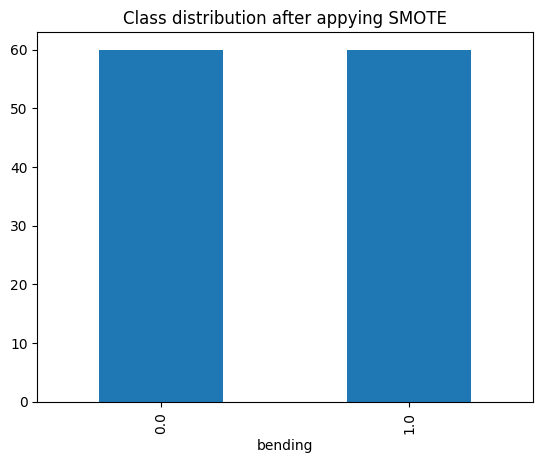

In [112]:
pd.Series(y_train_resampled_selected).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='bending')


Here is the confusion matrix for the improved Logistic Regression Model based on resampled data:
 [[60  0]
 [ 0 60]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<AxesSubplot: >

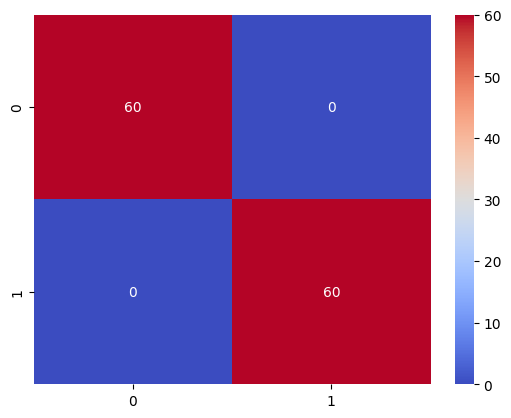

In [113]:
#Training Matrix for the resampled logistic regression model
y_pred = log_model_resampled.predict(x_train_resampled_selected.values)

print("\nHere is the confusion matrix for the improved Logistic Regression Model based on resampled data:\n", metrics.confusion_matrix(y_train_resampled,y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(y_train_resampled,y_pred).ravel()
print(metrics.classification_report(y_train_resampled,y_pred))
sns.heatmap(metrics.confusion_matrix(y_train_resampled,y_pred), cmap="coolwarm", annot=True)

The AUC score is 1.0


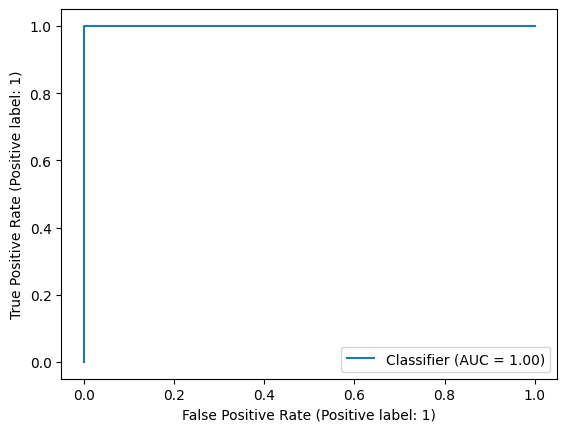

In [114]:
print('The AUC score is', metrics.roc_auc_score(y_train_resampled,y_pred))
metrics.RocCurveDisplay.from_predictions(y_train_resampled,y_pred)

##### - Testing the resampled logistic regression model (L=11, p=8):

In [115]:
files = df_test['filename'].unique()
df_test_best = create_df(df_test,l_max_log_resampled)
#print(df_test_best)

y_label = df_test_best['bending']
x_test_resampled = df_test_best.loc[:, df_test_best.columns != 'bending']
#print(x_test_resampled)


Here is the confusion matrix for testing the resampled logistic regression model:
 [[15  0]
 [ 1  3]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       1.00      0.75      0.86         4

    accuracy                           0.95        19
   macro avg       0.97      0.88      0.91        19
weighted avg       0.95      0.95      0.94        19



<AxesSubplot: >

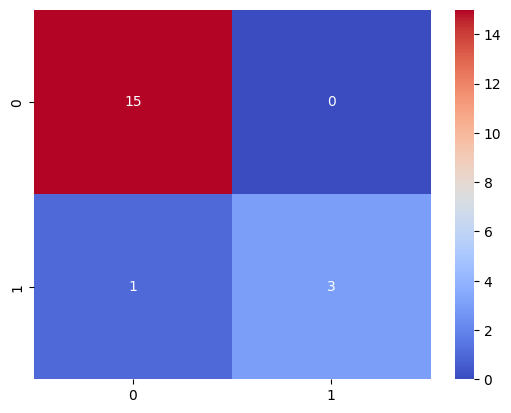

In [116]:
# Testing the resampled logistic regression model:
#print(y_label)
y_pred = log_model_resampled.predict(x_test_resampled.values)
print("\nHere is the confusion matrix for testing the resampled logistic regression model:\n", metrics.confusion_matrix(y_label,y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(y_label,y_pred).ravel()
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

The AUC score is 0.875


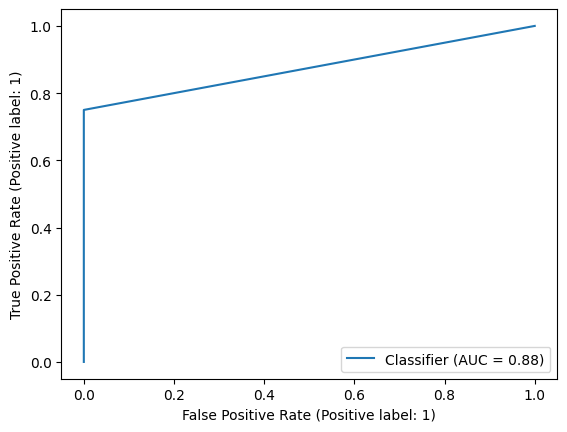

In [117]:
print('The AUC score is', metrics.roc_auc_score(y_label,y_pred))
metrics.RocCurveDisplay.from_predictions(y_label,y_pred)

### The accuracy of the improved model (=0.95) is the same as the former logistic regression model (=0.95). It may be because of the SMOTE resampling method, which may be simulating and reproducing datapoints that are easy to predict. Thus, the oversampling of the negative class is not providing meaningful information to the model. 

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments: L = 1, C = 2.78

In [24]:
# Finding the best C value for L = {1, 2, 3 ... 20}  --- L1-penalized logistic regression model

l=1
dummy_score = 0
l1_model_selected=0
l_max_l1 = 0
for df in lst_df_time_domain:
    y_label = df['bending']
    x_features = df.loc[:, df.columns != 'bending']
    l1_model = LogisticRegressionCV(penalty = 'l1', max_iter=1000, scoring='f1', solver='liblinear')  
    l1_model.fit(x_features, y_label)
    score = l1_model.scores_
    avg_lst = []
    for lst in score[1.0]:
        avg = sum(lst)/len(lst)
        avg_lst.append(avg)
    score = max(avg_lst)
     
    if dummy_score < score:
        dummy_score = score
        l1_model_selected=l1_model
        l_max_l1 = l
        c = float(l1_model.C_)
        
    l += 1
l1_model=l1_model_selected
print('For L1-penalized Logistic Regression Model,')
print('optimal L:', l_max_l1)    
print('optimal C:',c)
# print('ranking', ranking)
print('score:', dummy_score)
print('l1_model:', l1_model)

For L1-penalized Logistic Regression Model,
optimal L: 1
optimal C: 2.782559402207126
score: 0.7
l1_model: LogisticRegressionCV(max_iter=1000, penalty='l1', scoring='f1',
                     solver='liblinear')


In [25]:
# Selecting the training dataset
df_train_best = lst_df_time_domain[l_max_l1-1]
#print(df_train_best)
y_label_train = df_train_best['bending']
#print(y_label_train)
x_features_train = df_train_best.loc[:, df_train_best.columns != 'bending']
#print(x_features_train)

The training accuracy score for the L1-penalized logistic regrssion model is 0.8888888888888888

Here is the confusion matrix:
 [[59  1]
 [ 1  8]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        60
         1.0       0.89      0.89      0.89         9

    accuracy                           0.97        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.97      0.97      0.97        69

The AUC score is 0.936111111111111


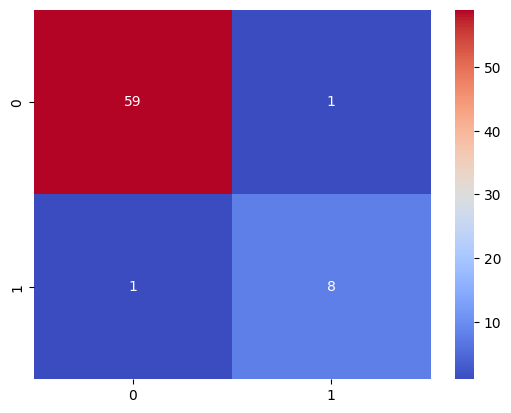

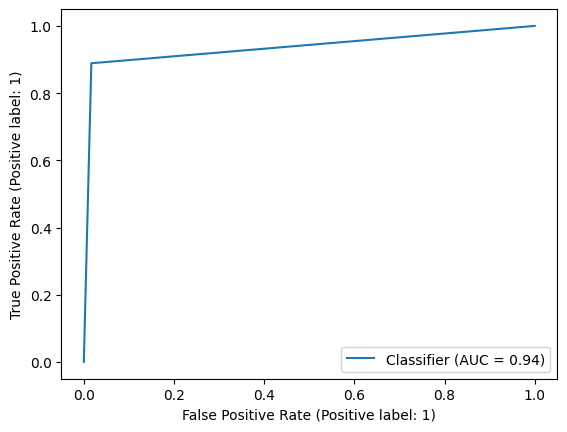

In [26]:
y_pred = l1_model.predict(x_features_train.values)

print('The training accuracy score for the L1-penalized logistic regrssion model is', l1_model.score(x_features_train,y_label_train))

print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label_train,y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(y_label_train,y_pred).ravel()
print(metrics.classification_report(y_label_train,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label_train,y_pred), cmap="coolwarm", annot=True)

print('The AUC score is', metrics.roc_auc_score(y_label_train,y_pred))
metrics.RocCurveDisplay.from_predictions(y_label_train,y_pred)


The test accuracy score for the L1-penalized logistic regrssion model is 1.0

Here is the confusion matrix:
 [[15  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

The AUC score is 1.0


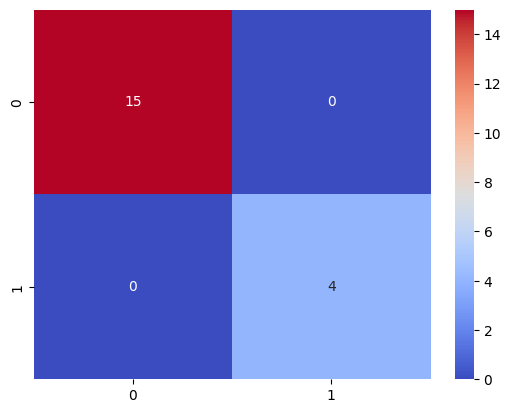

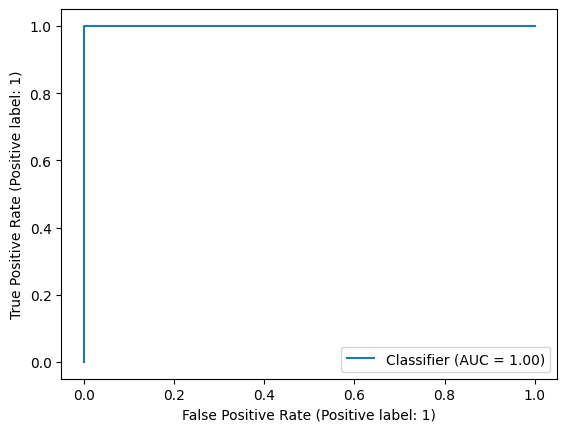

In [27]:
df_test_best = create_df(df_test,l_max_l1)
#print(df_best)
y_label = df_test_best['bending']
x_features = df_test_best.loc[:, df_test_best.columns != 'bending']
#print(x_features)
#print(y_label)

y_pred = l1_model.predict(x_features.values)
print('The test accuracy score for the L1-penalized logistic regrssion model is', l1_model.score(x_features,y_label))
print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label,y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(y_label,y_pred).ravel()
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

print('The AUC score is', metrics.roc_auc_score(y_label,y_pred))
metrics.RocCurveDisplay.from_predictions(y_label,y_pred)

#### ii. Comparison

#### Comparing the first logistic regression model which I applied RFECV for feature selection with the L1-penalizd logistic regression model, I found that the L1-penalized logistic regression model has higher test accuracy (= 1.0).

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [28]:
def create_df_multi (df_train,l): #function for reading each file, creating multiclass dataframe with the parameter L=l
    #print(df_train)
    files = df_train['filename'].unique()
    df_train_split = pd.DataFrame()
    
    col_lst = []
    for i in range(l*6):
        for feature in ['mean','median','std']:
            col_lst.append(feature+str(i))
    col_lst.append('activity')
    #print('len col_lst', len(col_lst))
    
    df_time_domain = pd.DataFrame(columns = col_lst)
    
    for file in files:  #reading each file, creating dataframe
        df_train_tem = pd.DataFrame()
        #print(file)
        data_tem = df_train.loc[df_train['filename']==file]
        data_tem = data_tem.drop(columns='filename')
        #print(data_tem)
        file_row = len(data_tem)
        
        #print(file_row)
        
        for i in range(1,l+1):
            #print('i',i)
            break_point = file_row//l
            #print("breakpoint", break_point)
            
            if i == 1:
                df_train_part1 = data_tem.iloc[:break_point,:]  #slect the first partition of the data. Break point == file_row//l
                df_train_part1 = df_train_part1.drop(columns= ['# Columns: time', 'bending'])
                activity = df_train_part1['activity']
                #print(activity)
                df_train_part1 = df_train_part1.drop(columns=['activity'])
                #print('df_train_part1', df_train_part1)
                df_train_tem = pd.DataFrame(df_train_part1)          
            else:   
                df_train1 = data_tem.iloc[((i-1)*break_point):(i*break_point),:]   #select the other partitions of the data by taking different steps
                df_train1 = df_train1.drop(columns = ['bending','# Columns: time','activity'])
                #print('df_train_1',df_train1)
                df_train_tem = pd.concat([df_train_tem.set_index(df_train1.index),df_train1],axis=1)

        df_train_tem = pd.concat([df_train_tem.set_index(activity.index),activity],axis=1)
                
        #print('df for each file', df_train_tem)  #dataframe for each file
        
        
        
        # computing time-domain features for each file
        
        #print(len(df_train_tem.columns))
        rowlst = []
        for i in range(len(df_train_tem.columns)-1):
            #print(i)
            col = df_train_tem.iloc[:,i]
            #print(col)
            median = statistics.median(col)
            mean = statistics.mean(col)
            std = statistics.stdev(col)
            #print(median)
            #print(mean)
            #print(std)
            rowlst.append(median)
            rowlst.append(median)
            rowlst.append(std)
        rowlst.append(df_train_tem.iloc[-1,-1])
        #print('rowlst', rowlst)
        #print('len rowlst', len(rowlst))
        df_time_domain.loc[len(df_time_domain)] = rowlst
        
        #print(df_time_domain)
    
        
        #df_train_split = pd.concat([df_train_split,df_train_tem],axis=0,ignore_index=False)
        #df_train_split.append(df_train_tem)
        
    return df_time_domain

#print('df_time_domian', create_df_multi(df_train, 4))
#print('df_time_domian', create_df_multi(df_test, 3))

In [29]:
#main loop: forming a list of dataframes with L={1,2...20}
lst_df_time_domain_multi = []
for l in range(1,21): #main for-loop
    #print(l)
    df_time_domain_multi = create_df_multi(df_train, l)
    lst_df_time_domain_multi.append(df_time_domain_multi)
    
print(lst_df_time_domain_multi)

#runtime = 1m12s

[     mean0  median0      std0  mean1  median1      std1   mean2  median2  \
0   34.750   34.750  4.441798  3.900    3.900  2.518991  15.500   15.500   
1   35.125   35.125  4.731790  4.025    4.025  2.538521  15.000   15.000   
2   34.750   34.750  4.948770  3.900    3.900  2.568680  15.500   15.500   
3   35.500   35.500  4.645944  3.845    3.845  2.335243  15.500   15.500   
4   35.290   35.290  4.742208  3.900    3.900  2.278004  15.330   15.330   
..     ...      ...       ...    ...      ...       ...     ...      ...   
64  44.500   44.500  1.618364  0.470    0.470  0.263111  16.250   16.250   
65  43.250   43.250  1.386098  0.470    0.470  0.315566  15.000   15.000   
66  41.750   41.750  2.243490  0.500    0.500  0.405469  19.125   19.125   
67  43.500   43.500  3.670666  0.500    0.500  0.630860  23.000   23.000   
68  44.330   44.330  1.558835  0.470    0.470  0.338690  23.000   23.000   

        std2  mean3  median3      std3  mean4  median4      std4  mean5  \
0   2.81227

In [30]:
# Finding the best C value for L = {1, 2, 3 ... 20} ---- l1-penalized multinomial regression model

l=1
dummy_score = 0
l1_model_selected=0
l_max_multi = 0
for df in lst_df_time_domain_multi: # for loop for different L
    y_label = df['activity']
    x_features = df.loc[:, df.columns != 'activity']
    multi_model = LogisticRegressionCV(penalty = 'l1', max_iter=1000, scoring='f1_weighted', solver='liblinear', n_jobs=-1)  
    multi_model.fit(x_features, y_label)
    score = multi_model.scores_
    avg_lst = []
    for lst in score.values():
        meanscore = np.mean(lst)
        avg_lst.append(meanscore)
    score = max(avg_lst)
     
    if dummy_score < score:
        dummy_score = score
        l1_model_selected=multi_model
        l_max_multi = l
        
    l += 1
multi_model=l1_model_selected
print("For L1-penalized multinomial regression model,")
print('optimal L:', l_max_multi)
print('score:', dummy_score)
print('multi_model:', multi_model)

For L1-penalized multinomial regression model,
optimal L: 1
score: 0.89927326007326
multi_model: LogisticRegressionCV(max_iter=1000, n_jobs=-1, penalty='l1',
                     scoring='f1_weighted', solver='liblinear')


#### The L1-penalized multinomial model: L = 1


Here is the confusion matrix for training the l1-penalized multinomial model:
 [[ 8  0  0  1  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 1  0  0 10  1  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  0 12]]
              precision    recall  f1-score   support

     bending       0.89      0.89      0.89         9
     cycling       1.00      1.00      1.00        12
       lying       1.00      1.00      1.00        12
     sitting       0.83      0.83      0.83        12
    standing       0.92      0.92      0.92        12
     walking       1.00      1.00      1.00        12

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



<AxesSubplot: >

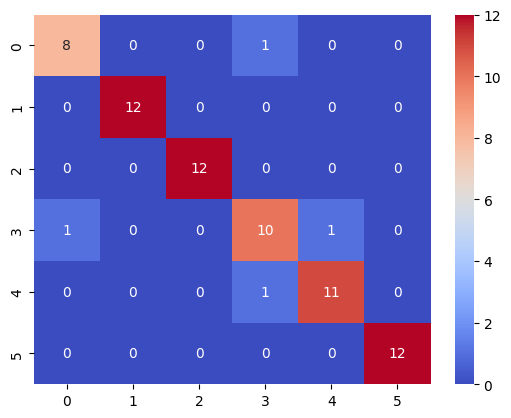

In [31]:
df_train_best = lst_df_time_domain_multi[l_max_multi-1]
#print(df_train_best)
y_label = df_train_best['activity']
x_features = df_train_best.loc[:, df_train_best.columns != 'activity']
#print(x_features)
#print(y_label)

multi_model.fit(x_features, y_label)
y_pred = multi_model.predict(x_features.values)
print("\nHere is the confusion matrix for training the l1-penalized multinomial model:\n", metrics.confusion_matrix(y_label,y_pred))
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

#### Note: Since the ROC curve and the ROC AUC score are tools to evaluate binary classification models, they are not applicable to multiclass classification. They show the separability of the class by all possible thresholds, but for multiclass classification, there is no single decision boundary or threshold.

The test accuracy score for the L1-penalized multinomial regrssion model is 0.8932330827067669

Here is the confusion matrix:
 [[3 0 0 1 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 1 0 2 0]
 [0 0 0 0 0 3]]
              precision    recall  f1-score   support

     bending       1.00      0.75      0.86         4
     cycling       1.00      1.00      1.00         3
       lying       0.75      1.00      0.86         3
     sitting       0.75      1.00      0.86         3
    standing       1.00      0.67      0.80         3
     walking       1.00      1.00      1.00         3

    accuracy                           0.89        19
   macro avg       0.92      0.90      0.90        19
weighted avg       0.92      0.89      0.89        19



<AxesSubplot: >

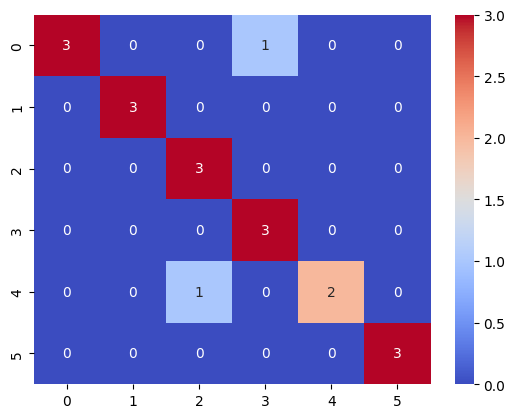

In [32]:
df_test_best = create_df_multi(df_test,l_max_multi)
#print(df_test_best)
y_label = df_test_best['activity']
x_features = df_test_best.loc[:, df_test_best.columns != 'activity']
#print(x_features)
#print(y_label)
y_pred = multi_model.predict(x_features.values)
print('The test accuracy score for the L1-penalized multinomial regrssion model is', multi_model.score(x_features,y_label))
print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label,y_pred))
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

#### ii. Gaussian Naive Bayes

In [33]:
# Finding the best C value for L = {1, 2, 3 ... 20} ---- Gaussian Naive Bayes

l=1
dummy_score = 0
gnb_model=0
l_max_gnb = 0
for df in lst_df_time_domain_multi: # for loop for different L
    y_label = df['activity']
    x_features = df.loc[:, df.columns != 'activity']
    model_gnb = GridSearchCV(estimator = GaussianNB(), param_grid={})  
    model_gnb.fit(x_features, y_label)
    score = model_gnb.cv_results_['mean_test_score']
    avg_lst = []
    for lst in score:  
        meanscore = np.mean(lst)
        avg_lst.append(meanscore)
    score = max(avg_lst)
     
    if dummy_score < score:
        dummy_score = score
        gnb_model = model_gnb
        l_max_gnb = l
    l += 1 

print('For Gaussian Naive Bayes Model,') 
print('optimal L:', l_max_gnb)    
print('score:', dummy_score)
print('model_gnb', gnb_model)

For Gaussian Naive Bayes Model,
optimal L: 5
score: 0.8417582417582418
model_gnb GridSearchCV(estimator=GaussianNB(), param_grid={})


The training accuracy score for the Gaussian Naive Bayes' model is 0.9710144927536232

Here is the confusion matrix:
 [[ 8  0  1  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  0 12]]
              precision    recall  f1-score   support

     bending       1.00      0.89      0.94         9
     cycling       1.00      1.00      1.00        12
       lying       0.92      1.00      0.96        12
     sitting       0.92      1.00      0.96        12
    standing       1.00      0.92      0.96        12
     walking       1.00      1.00      1.00        12

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



<AxesSubplot: >

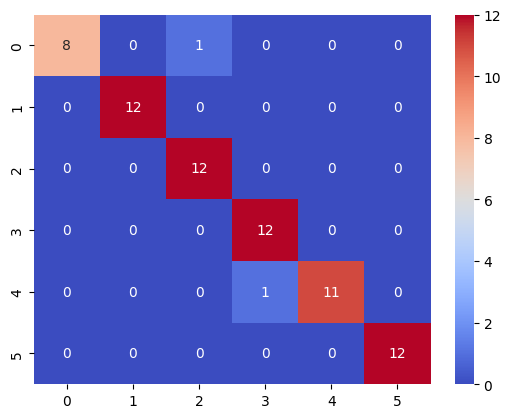

In [34]:
df_train_best = lst_df_time_domain_multi[l_max_gnb-1]
#print(df_train_best)
y_label = df_train_best['activity']
x_features = df_train_best.loc[:, df_train_best.columns != 'activity']
#print(x_features)
#print(y_label)

model_gnb.fit(x_features, y_label)
y_pred = model_gnb.predict(x_features.values)

print("The training accuracy score for the Gaussian Naive Bayes' model is", model_gnb.score(x_features,y_label))

print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label,y_pred))
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

The test accuracy score for the Gaussian Naive Bayes' model is 0.8947368421052632

Here is the confusion matrix:
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]
              precision    recall  f1-score   support

     bending       1.00      1.00      1.00         4
     cycling       1.00      1.00      1.00         3
       lying       1.00      1.00      1.00         3
     sitting       0.67      0.67      0.67         3
    standing       0.67      0.67      0.67         3
     walking       1.00      1.00      1.00         3

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19



<AxesSubplot: >

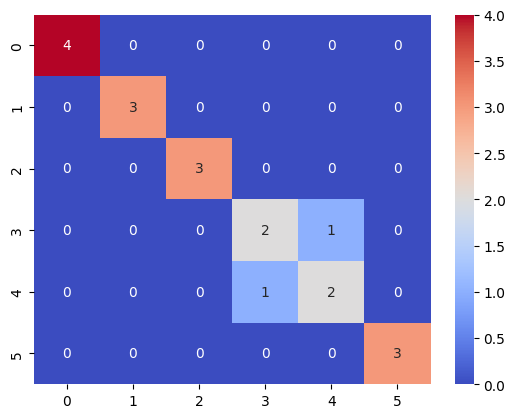

In [35]:
df_test_best = create_df_multi(df_test,l_max_gnb)
#print(df_best)
y_label = df_test_best['activity']
x_features = df_test_best.loc[:, df_test_best.columns != 'activity']
#print(x_features)
#print(y_label)
y_pred = model_gnb.predict(x_features.values)
print("The test accuracy score for the Gaussian Naive Bayes' model is", model_gnb.score(x_features,y_label))
print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label,y_pred))
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

#### ii. Multinomial Naive Bayes (L=4)

In [36]:
# Finding the best C value for L = {1, 2, 3 ... 20} ---- Multinomial Naive Bayes'

l=1
dummy_score = 0
model_mnb=0
l_max_mnb = 0
for df in lst_df_time_domain_multi:
    y_label = df['activity']
    x_features = df.loc[:, df.columns != 'activity']
    model = GridSearchCV(estimator = MultinomialNB(), param_grid={})  
    model.fit(x_features, y_label)
    score = model.cv_results_['mean_test_score']
    avg_lst = []
    for lst in score: 
        meanscore = np.mean(lst)
        avg_lst.append(meanscore)
    #print(max(avg_lst))
    score = max(avg_lst)
     
    if dummy_score < score:
        dummy_score = score
        l_max_mnb = l
        model_mnb = model
        
    l += 1  
print("For Multinomial Naive Bayes' model,")
print("optimal L:", l_max_mnb)
print('score:', dummy_score)
print('model', model_mnb)

For Multinomial Naive Bayes' model,
optimal L: 4
score: 0.8571428571428571
model GridSearchCV(estimator=MultinomialNB(), param_grid={})


The training accuracy score for the Multinomial Naive Bayes' model is 0.9420289855072463

Here is the confusion matrix:
 [[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 1  0  1 10  0  0]
 [ 0  0  0  2 10  0]
 [ 0  0  0  0  0 12]]
              precision    recall  f1-score   support

     bending       0.90      1.00      0.95         9
     cycling       1.00      1.00      1.00        12
       lying       0.92      1.00      0.96        12
     sitting       0.83      0.83      0.83        12
    standing       1.00      0.83      0.91        12
     walking       1.00      1.00      1.00        12

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



<AxesSubplot: >

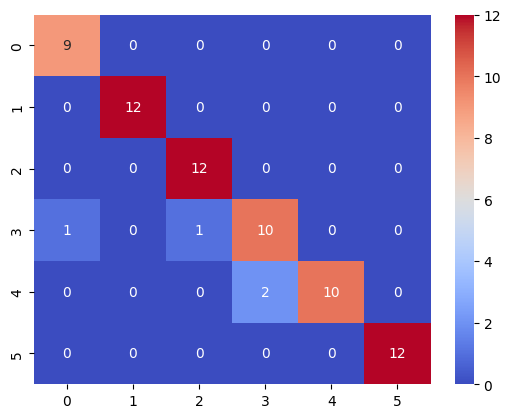

In [39]:
df_train_best = lst_df_time_domain_multi[l_max_mnb-1]
#print(df_train_best)
y_label = df_train_best['activity']
x_features = df_train_best.loc[:, df_train_best.columns != 'activity']
#print(x_features)
#print(y_label)

model_mnb.fit(x_features, y_label)
y_pred = model_mnb.predict(x_features.values)

print("The training accuracy score for the Multinomial Naive Bayes' model is", model_mnb.score(x_features,y_label))

print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label,y_pred))
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

The test accuracy score for the Multinomial Naive Bayes' model is 0.8947368421052632

Here is the confusion matrix:
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]
              precision    recall  f1-score   support

     bending       1.00      1.00      1.00         4
     cycling       1.00      1.00      1.00         3
       lying       1.00      1.00      1.00         3
     sitting       0.67      0.67      0.67         3
    standing       0.67      0.67      0.67         3
     walking       1.00      1.00      1.00         3

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19



<AxesSubplot: >

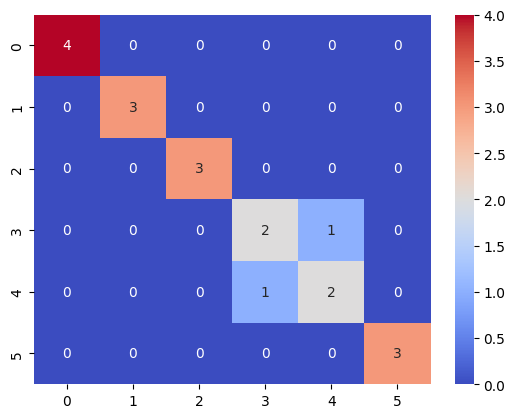

In [38]:
df_test_best = create_df_multi(df_test,l_max_mnb)
#print(df_best)
y_label = df_test_best['activity']
x_features = df_test_best.loc[:, df_test_best.columns != 'activity']
#print(x_features)
#print(y_label)

y_pred = model_mnb.predict(x_features.values)
print("The test accuracy score for the Multinomial Naive Bayes' model is", model_mnb.score(x_features,y_label))
print("\nHere is the confusion matrix:\n", metrics.confusion_matrix(y_label,y_pred))
#tn, fp, fn, tp = metrics.confusion_matrix(y_label,y_pred).ravel()
print(metrics.classification_report(y_label,y_pred))
sns.heatmap(metrics.confusion_matrix(y_label,y_pred), cmap="coolwarm", annot=True)

#### iii. Comparison

##### For the Naive Bayes' classifiers for multi-class classification, the Gaussian Naive Bayes' model and the Multinomial Naive Bayes' model have similar test accuracy (=0.89).